# Job Survey of India

## Import and Load Dataset

In [112]:
import pandas as pd 

In [113]:
raw_df=pd.read_csv('JobSurveyIndia.csv',index_col='Unnamed: 0')

In [114]:
raw_df

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,Private Sector,Art,No,Yes,4.0,600K-900K
2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,Private Sector,Technical,No,Yes,5.0,1200K-1500K
...,...,...,...,...,...,...
395,Private Sector,Non-Technical,No,Yes,5.0,600K-900K
396,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
397,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
398,Government Sector,Non-Technical,No,No,5.0,More Than 1500K


In [115]:
raw_df.describe()

,IdealNumberOfWorkdays
count,400.000000
mean,4.902500
std,0.805989
min,4.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,7.000000


In [116]:

import plotly.express as px 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(16,12)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [117]:
raw_df['Employment Background']=raw_df['Employment Background'].str.strip()
raw_df['Employment Sector']=raw_df['Employment Sector'].str.strip()
raw_df['Public Dealing']=raw_df['Public Dealing'].str.strip()
raw_df['Degree']=raw_df['Degree'].str.strip()
raw_df['IdealYearlyIncome']=raw_df['IdealYearlyIncome'].str.strip()





In [118]:
raw_df

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
0,Private Sector,Technical,No,Yes,4.0,More Than 1500K
1,Private Sector,Art,No,Yes,4.0,600K-900K
2,Government Sector,Technical,No,Yes,6.0,900K-1200K
3,Government Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
4,Private Sector,Technical,No,Yes,5.0,1200K-1500K
...,...,...,...,...,...,...
395,Private Sector,Non-Technical,No,Yes,5.0,600K-900K
396,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
397,Government Sector,Non-Technical,Yes,No,4.0,900K-1200K
398,Government Sector,Non-Technical,No,No,5.0,More Than 1500K


In [119]:
raw_df['Employment Background'].unique()

array(['Technical', 'Art', 'Non-Technical'], dtype=object)

In [120]:
px.histogram(raw_df,x='Employment Background',color='IdealYearlyIncome')

<AxesSubplot:xlabel='Employment Sector', ylabel='IdealNumberOfWorkdays'>

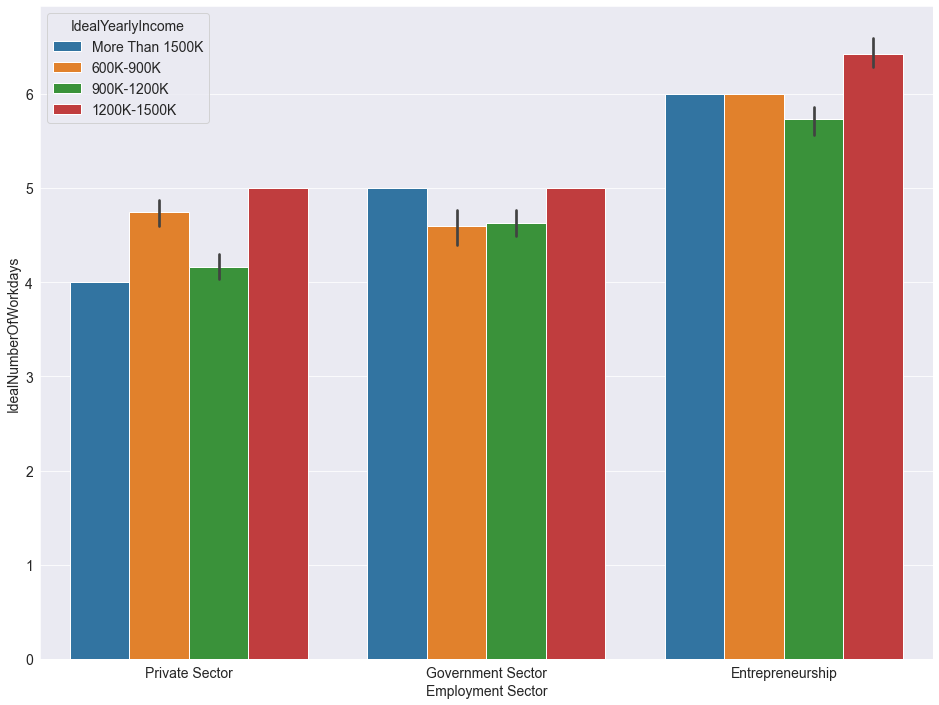

In [121]:
sns.barplot(x='Employment Sector',y='IdealNumberOfWorkdays',data=raw_df,hue='IdealYearlyIncome')

* People who are engaged in Entrepreneurship works more number of days as compared to those of Private and Government Sector

<AxesSubplot:xlabel='IdealYearlyIncome', ylabel='IdealNumberOfWorkdays'>

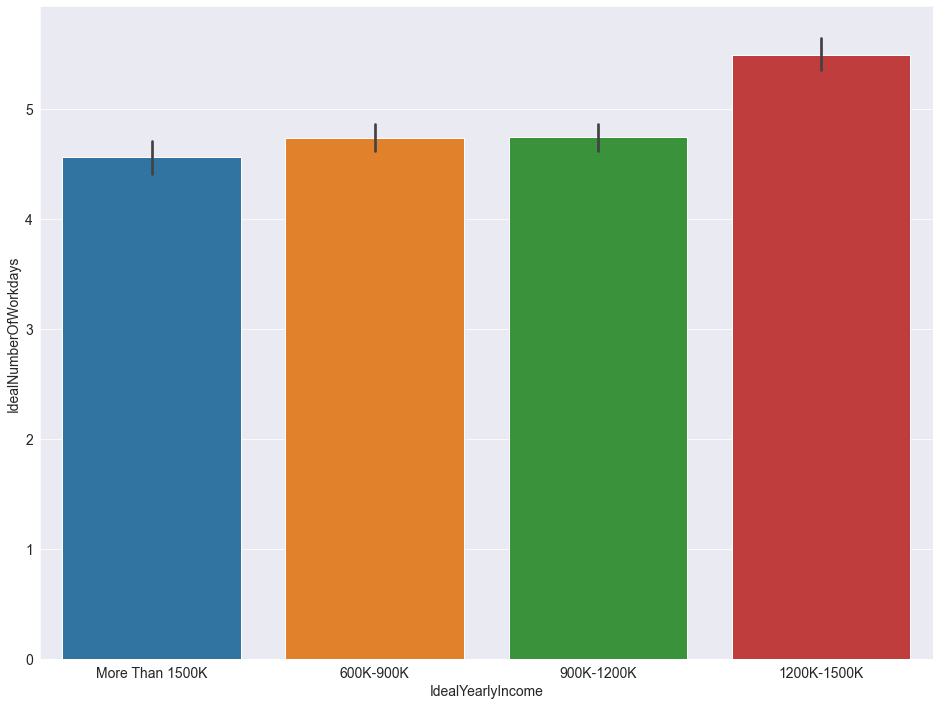

In [122]:
sns.barplot(x='IdealYearlyIncome',y='IdealNumberOfWorkdays',data=raw_df)

* People who earns more tha 1500k doesn't have to work less number of days as comapred to others.

In [123]:
raw_df.isna().sum()

Employment Sector        0
Employment Background    0
Public Dealing           0
Degree                   0
IdealNumberOfWorkdays    0
IdealYearlyIncome        0
dtype: int64

## Creating Training , Validation and Tests sets

In [249]:
from sklearn.model_selection import train_test_split

In [327]:
train_val_df,test_df=train_test_split(raw_df,test_size=0.1,random_state=42)


In [328]:
train_df,val_df=train_test_split(train_val_df,test_size=0.1,random_state=42)

In [329]:
train_df

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,IdealYearlyIncome
255,Private Sector,Technical,No,Yes,4.0,More Than 1500K
121,Private Sector,Non-Technical,Yes,Yes,4.0,900K-1200K
119,Private Sector,Technical,No,Yes,5.0,1200K-1500K
311,Private Sector,Technical,No,Yes,5.0,1200K-1500K
362,Government Sector,Art,Yes,No,5.0,900K-1200K
...,...,...,...,...,...,...
387,Private Sector,Non-Technical,Yes,Yes,4.0,More Than 1500K
59,Entrepreneurship,Non-Technical,Yes,No,6.0,900K-1200K
14,Private Sector,Non-Technical,Yes,Yes,4.0,More Than 1500K
87,Private Sector,Non-Technical,Yes,Yes,4.0,900K-1200K


In [330]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 170 to 289
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Employment Sector      36 non-null     object 
 1   Employment Background  36 non-null     object 
 2   Public Dealing         36 non-null     object 
 3   Degree                 36 non-null     object 
 4   IdealNumberOfWorkdays  36 non-null     float64
 5   IdealYearlyIncome      36 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.0+ KB


## Identifying input and taregt cols

In [331]:
input_cols=list(raw_df.columns)[0:-1]

In [332]:
input_cols

['Employment Sector',
 'Employment Background',
 'Public Dealing',
 'Degree',
 'IdealNumberOfWorkdays']

In [333]:
target_col='IdealYearlyIncome'

In [334]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()

In [335]:
train_inputs

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays
255,Private Sector,Technical,No,Yes,4.0
121,Private Sector,Non-Technical,Yes,Yes,4.0
119,Private Sector,Technical,No,Yes,5.0
311,Private Sector,Technical,No,Yes,5.0
362,Government Sector,Art,Yes,No,5.0
...,...,...,...,...,...
387,Private Sector,Non-Technical,Yes,Yes,4.0
59,Entrepreneurship,Non-Technical,Yes,No,6.0
14,Private Sector,Non-Technical,Yes,Yes,4.0
87,Private Sector,Non-Technical,Yes,Yes,4.0


In [336]:
val_inputs=val_df[input_cols].copy()
val_targets=val_df[target_col].copy()

In [337]:
test_inputs=test_df[input_cols].copy()
test_targets=test_df[target_col].copy()

In [261]:
#Identifying numeric and categorcial column

In [338]:
import numpy as np 

In [339]:
numeric_cols=train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_inputs.select_dtypes('object').columns.tolist()

In [340]:
train_inputs[numric_cols]

,IdealNumberOfWorkdays
255,4.0
121,4.0
119,5.0
311,5.0
362,5.0
...,...
387,4.0
59,6.0
14,4.0
87,4.0


## Scaling Numeric features

In [341]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [342]:
scaler=StandardScaler()

In [343]:
scaler.fit(raw_df[numeric_cols])

StandardScaler()

In [344]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

## Encoding categrorcial data

In [345]:
raw_df[categorical_cols].nunique()

Employment Sector        3
Employment Background    3
Public Dealing           2
Degree                   2
dtype: int64

In [304]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [346]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [347]:
encoded_cols=list(encoder.get_feature_names(categorical_cols))


In [348]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols].fillna('Unknown'))
val_inputs[encoded_cols]=encoder.transform(val_inputs[categorical_cols].fillna('Unknown'))
test_inputs[encoded_cols]=encoder.transform(test_inputs[categorical_cols].fillna('Unknown'))

In [308]:
train_inputs

,Employment Sector,Employment Background,Public Dealing,Degree,IdealNumberOfWorkdays,Employment Sector_Entrepreneurship,Employment Sector_Government Sector,Employment Sector_Private Sector,Employment Background_Art,Employment Background_Non-Technical,Employment Background_Technical,Public Dealing_No,Public Dealing_Yes,Degree_No,Degree_Yes
96,Government Sector,Non-Technical,No,No,0.121121,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
277,Private Sector,Technical,No,Yes,0.121121,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
307,Government Sector,Non-Technical,Yes,Yes,-1.121145,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
337,Government Sector,Non-Technical,No,No,0.121121,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
248,Government Sector,Non-Technical,Yes,No,-1.121145,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,Private Sector,Non-Technical,Yes,Yes,-1.121145,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
333,Government Sector,Non-Technical,Yes,Yes,-1.121145,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
324,Entrepreneurship,Technical,No,Yes,0.121121,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
315,Private Sector,Non-Technical,No,Yes,0.121121,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## Training the model

In [309]:
from sklearn.linear_model import LogisticRegression

In [349]:
model=LogisticRegression(solver='liblinear')

In [350]:
model.fit(train_inputs[numeric_cols+encoded_cols],train_targets)

LogisticRegression(solver='liblinear')

In [351]:

n=len(model.coef_.tolist())
weight_df=pd.DataFrame({
    'feature':(numeric_cols+encoded_cols),
    'weight':model.coef_.tolist()[0]

})

In [352]:
weight_df

,feature,weight
0,IdealNumberOfWorkdays,1.841555
1,Employment Sector_Entrepreneurship,-1.714188
2,Employment Sector_Government Sector,-0.327305
3,Employment Sector_Private Sector,1.492806
4,Employment Background_Art,0.046058
5,Employment Background_Non-Technical,-0.202146
6,Employment Background_Technical,-0.392599
7,Public Dealing_No,-0.269390
8,Public Dealing_Yes,-0.279296
9,Degree_No,0.065875


<AxesSubplot:xlabel='weight', ylabel='feature'>

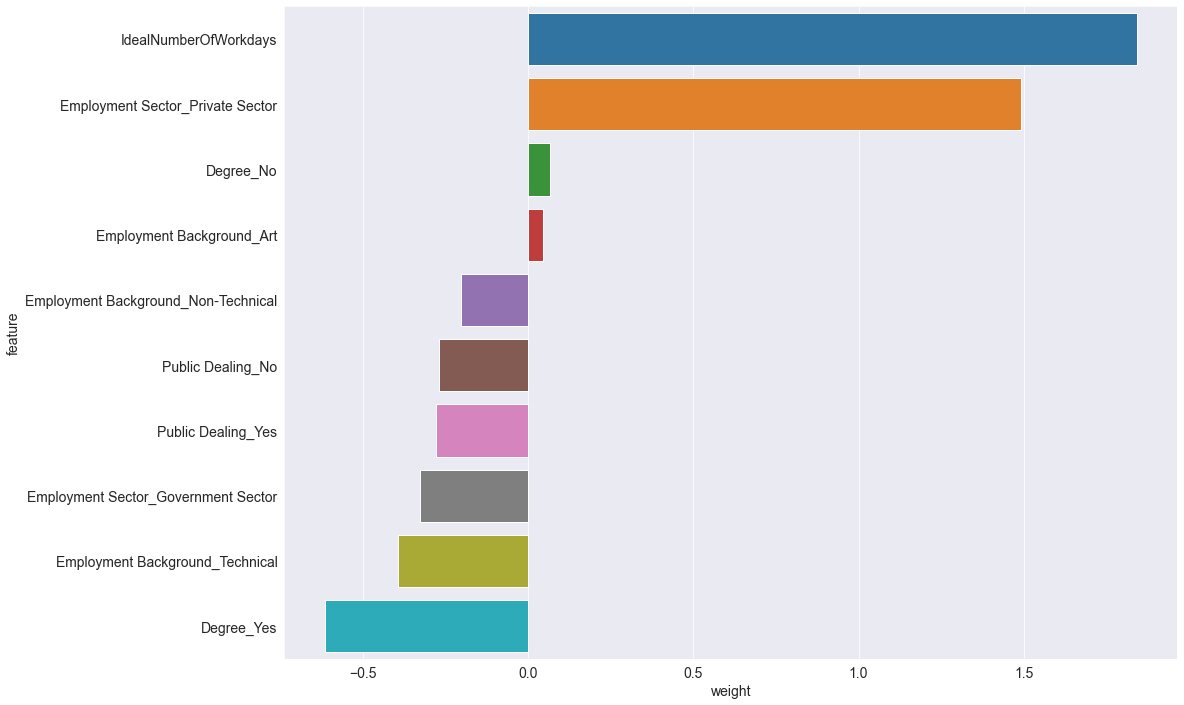

In [353]:
sns.barplot(data=weight_df.sort_values('weight',ascending=False).head(10),x='weight',y='feature')


## Making Prediction and evaluate Model

In [354]:
X_train=train_inputs[numeric_cols+encoded_cols]
X_val=val_inputs[numeric_cols+encoded_cols]
X_test=test_inputs[numeric_cols+encoded_cols]

In [355]:
train_preds=model.predict(X_train)

In [356]:
from sklearn.metrics import accuracy_score


In [357]:
accuracy=accuracy_score(train_targets,train_preds)
print("Accuracy : {:.2f}%".format(accuracy*100))

Accuracy : 66.36%


## Training with KNN

In [358]:
from sklearn.neighbors import KNeighborsClassifier

In [359]:
train_df[target_col].nunique()

4

In [360]:
model=KNeighborsClassifier(n_neighbors=10)

In [361]:
model.fit(X_train,train_targets)

KNeighborsClassifier(n_neighbors=10)

In [362]:
train_preds=model.predict(X_train)

In [363]:
accuracy=accuracy_score(train_targets,train_preds)
print("Accuracy : {:.2f}%".format(accuracy*100))

Accuracy : 80.25%


## Predciting Accuracy with Test data

In [365]:
test_preds=model.predict(X_test)

In [366]:
accuracy=accuracy_score(test_targets,test_preds)
print("Accuracy : {:.2f}%".format(accuracy*100))

Accuracy : 85.00%
